In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\itvedant\Vscode\dataset_olympics.csv")

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.shape

(70000, 15)

In [6]:
df.size

1050000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [8]:
df.duplicated().sum()

383

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2671
Height    15876
Weight    16718
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     59931
dtype: int64

In [12]:
df['Medal'].fillna('looser',inplace=True)

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
df['Weight'].fillna(df['Weight'].mean(),inplace=True)

In [15]:
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [16]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [17]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,looser
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,looser


In [18]:
df.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",looser
69999,35658,Marek Fiurek,M,23.0,180.0,68.0,Czech Republic,CZE,1998 Winter,1998,Winter,Nagano,Nordic Combined,Nordic Combined Men's Team,looser


In [19]:
df['Medal'].unique()

array(['looser', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [20]:
df['Medal'].value_counts()

Medal
looser    59931
Gold       3290
Bronze     3208
Silver     3188
Name: count, dtype: int64

In [21]:
df1=df.drop(['Name','Team','NOC','Games','City','Sport','Event'],axis=1,inplace=True)

In [22]:
df.head(2)

,ID,Sex,Age,Height,Weight,Year,Season,Medal
0,1,M,24.0,180.0,80.0,1992,Summer,looser
1,2,M,23.0,170.0,60.0,2012,Summer,looser


In [23]:
cat_col=df.select_dtypes(['object'])
num_col=df.select_dtypes(['int64','float64'])

In [24]:
num_col.head()

,ID,Age,Height,Weight,Year
0,1,24.0,180.000000,80.000000,1992
1,2,23.0,170.000000,60.000000,2012
2,3,24.0,175.504736,70.900216,1920
3,4,34.0,175.504736,70.900216,1900
4,5,21.0,185.000000,82.000000,1988


In [25]:
cat_col.head()

,Sex,Season,Medal
0,M,Summer,looser
1,M,Summer,looser
2,M,Summer,looser
3,M,Summer,Gold
4,F,Winter,looser


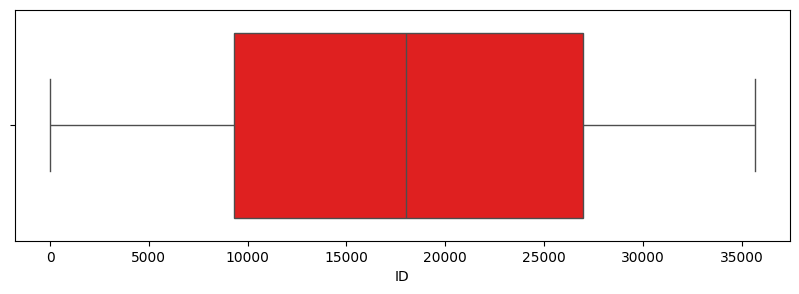

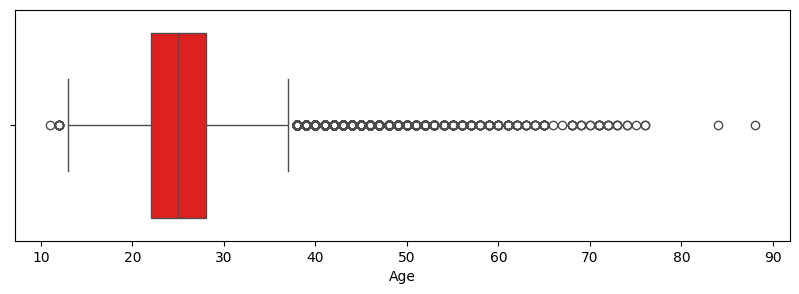

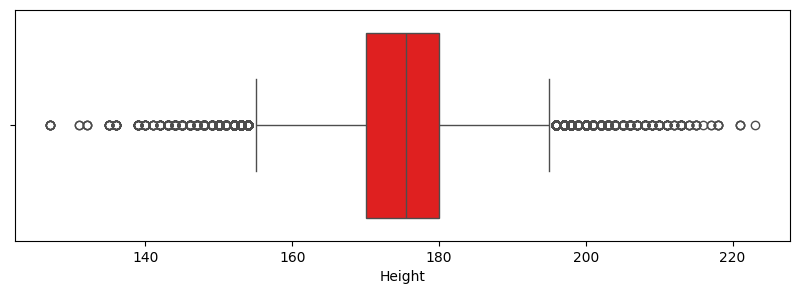

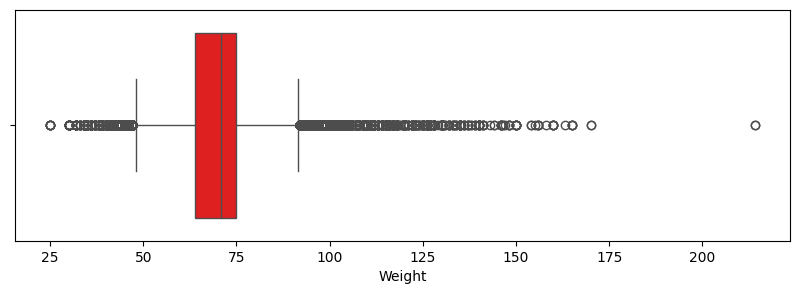

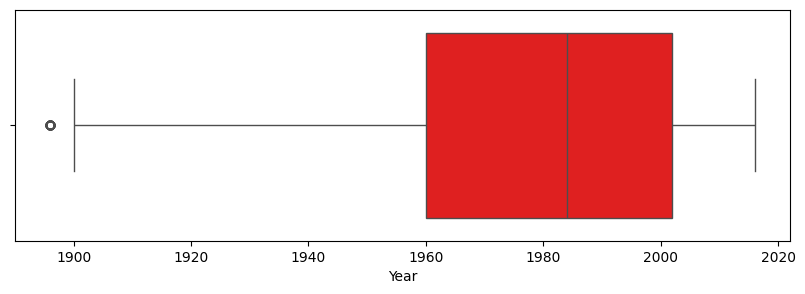

In [26]:
for col in num_col:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=num_col[col],color='red')
    plt.show()

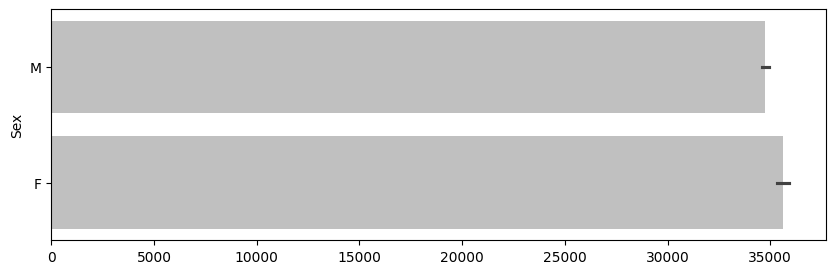

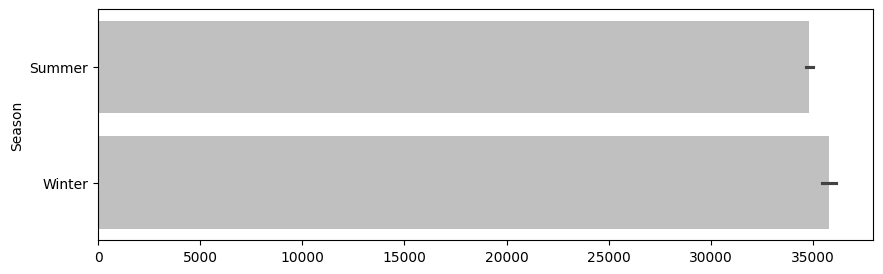

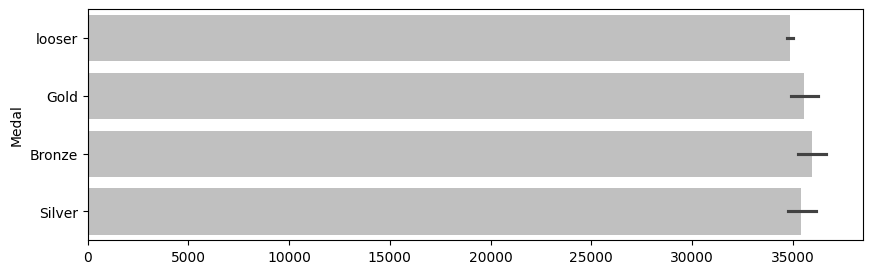

In [27]:
for col in cat_col:
    plt.figure(figsize=(10,3))
    sns.barplot(cat_col[col],color='silver')
    plt.show()

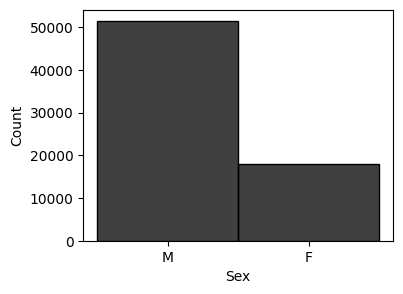

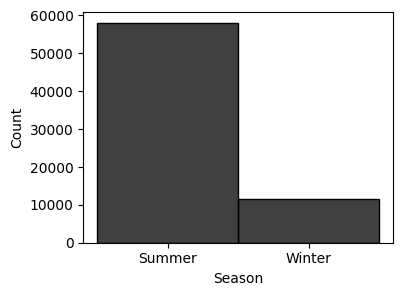

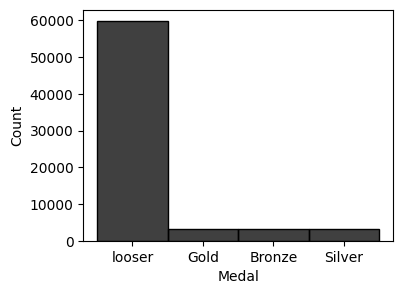

In [28]:
for col in cat_col:
    plt.figure(figsize=(4,3))
    sns.histplot(cat_col[col],color='black')
    plt.show()

In [29]:
df.head()

,ID,Sex,Age,Height,Weight,Year,Season,Medal
0,1,M,24.0,180.000000,80.000000,1992,Summer,looser
1,2,M,23.0,170.000000,60.000000,2012,Summer,looser
2,3,M,24.0,175.504736,70.900216,1920,Summer,looser
3,4,M,34.0,175.504736,70.900216,1900,Summer,Gold
4,5,F,21.0,185.000000,82.000000,1988,Winter,looser


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
for col in cat_col:
    df[col]=le.fit_transform(df[[col]])

In [33]:
df.head(2)

,ID,Sex,Age,Height,Weight,Year,Season,Medal
0,1,1,24.0,180.0,80.0,1992,0,3
1,2,1,23.0,170.0,60.0,2012,0,3


In [34]:
x=df.drop('Medal',axis=1)
y=df['Medal']

In [37]:
x.columns

Index(['ID', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Season'], dtype='object')

In [36]:
y.value_counts()

Medal
3    59931
1     3290
0     3208
2     3188
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split